In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from pandas.plotting import scatter_matrix
import dask.dataframe as dd
# from pyspark.sql import SparkSession

# spark = SparkSession.builder.getOrCreate()

In [2]:
import torch

print(torch.version.cuda)
print(torch.backends.cudnn.enabled)

12.8
True


In [3]:
if not torch.cuda.is_available():
    raise RuntimeError("CUDA is not available. Check your drivers and installation!")
print("Found", torch.cuda.device_count(), "GPU(s):", [torch.cuda.get_device_name(i) for i in range(torch.cuda.device_count())])


Found 1 GPU(s): ['NVIDIA GeForce RTX 3070 Ti Laptop GPU']


In [4]:
device = torch.device("cuda")              # automatically picks GPU:0
# or explicitly:
# device = torch.device("cuda:0")          # first GPU
# device = torch.device("cuda:1")          # second GPU, if you have >1

## Dataset2: Matrix Rocker 4 Encoder not Working (Anomaly)

In [5]:
df2 = pd.read_csv('./Datasets/Dataset02_Matrix_Rocker4EncoderNotWorking.csv')
df2.head()

,Encoder_vAxisHFP_1,Encoder_vAxisHFP_2,Encoder_vAxisHFP_3,Encoder_vAxisHFP_4,Encoder_vAxisHFP_5,Encoder_vAxisHFP_6,Encoder_vSafetyHFP_1,Encoder_vSafetyHFP_2,Encoder_vSafetyHFP_3,Encoder_vSafetyHFP_4,Encoder_vSafetyHFP_5,Encoder_vSafetyHFP_6,Time
0,-0.018964,-0.025433,0.008373,0.001387,-0.014673,0.010472,-0.000006,0.000030,9.411765e-07,0.0,-0.000021,-0.000006,0.00000
1,-0.025091,-0.021360,0.007988,-0.001536,-0.008852,0.002152,-0.000006,0.000030,9.411765e-07,0.0,-0.000021,-0.000005,0.00025
2,-0.026657,-0.021689,0.007212,-0.000004,-0.005338,-0.005628,-0.000006,0.000030,9.411765e-07,0.0,-0.000021,-0.000005,0.00050
3,-0.023970,-0.019123,0.009580,-0.001420,-0.002740,-0.009748,-0.000006,0.000015,9.411765e-07,0.0,-0.000021,-0.000005,0.00075
4,-0.027541,-0.020061,0.001411,0.006533,-0.010312,-0.012460,-0.000014,0.000015,9.411765e-07,0.0,-0.000019,-0.000005,0.00100


In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69377 entries, 0 to 69376
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Encoder_vAxisHFP_1    69377 non-null  float64
 1   Encoder_vAxisHFP_2    69377 non-null  float64
 2   Encoder_vAxisHFP_3    69377 non-null  float64
 3   Encoder_vAxisHFP_4    69377 non-null  float64
 4   Encoder_vAxisHFP_5    69377 non-null  float64
 5   Encoder_vAxisHFP_6    69377 non-null  float64
 6   Encoder_vSafetyHFP_1  69377 non-null  float64
 7   Encoder_vSafetyHFP_2  69377 non-null  float64
 8   Encoder_vSafetyHFP_3  69377 non-null  float64
 9   Encoder_vSafetyHFP_4  69377 non-null  float64
 10  Encoder_vSafetyHFP_5  69377 non-null  float64
 11  Encoder_vSafetyHFP_6  69377 non-null  float64
 12  Time                  69377 non-null  float64
dtypes: float64(13)
memory usage: 6.9 MB


In [7]:
df2['Time'] = pd.to_timedelta(df2['Time'], unit='s')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69377 entries, 0 to 69376
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   Encoder_vAxisHFP_1    69377 non-null  float64        
 1   Encoder_vAxisHFP_2    69377 non-null  float64        
 2   Encoder_vAxisHFP_3    69377 non-null  float64        
 3   Encoder_vAxisHFP_4    69377 non-null  float64        
 4   Encoder_vAxisHFP_5    69377 non-null  float64        
 5   Encoder_vAxisHFP_6    69377 non-null  float64        
 6   Encoder_vSafetyHFP_1  69377 non-null  float64        
 7   Encoder_vSafetyHFP_2  69377 non-null  float64        
 8   Encoder_vSafetyHFP_3  69377 non-null  float64        
 9   Encoder_vSafetyHFP_4  69377 non-null  float64        
 10  Encoder_vSafetyHFP_5  69377 non-null  float64        
 11  Encoder_vSafetyHFP_6  69377 non-null  float64        
 12  Time                  69377 non-null  timedelta64[ns]
dtypes

In [8]:
df2.head()

,Encoder_vAxisHFP_1,Encoder_vAxisHFP_2,Encoder_vAxisHFP_3,Encoder_vAxisHFP_4,Encoder_vAxisHFP_5,Encoder_vAxisHFP_6,Encoder_vSafetyHFP_1,Encoder_vSafetyHFP_2,Encoder_vSafetyHFP_3,Encoder_vSafetyHFP_4,Encoder_vSafetyHFP_5,Encoder_vSafetyHFP_6,Time
0,-0.018964,-0.025433,0.008373,0.001387,-0.014673,0.010472,-0.000006,0.000030,9.411765e-07,0.0,-0.000021,-0.000006,0 days 00:00:00
1,-0.025091,-0.021360,0.007988,-0.001536,-0.008852,0.002152,-0.000006,0.000030,9.411765e-07,0.0,-0.000021,-0.000005,0 days 00:00:00.000250
2,-0.026657,-0.021689,0.007212,-0.000004,-0.005338,-0.005628,-0.000006,0.000030,9.411765e-07,0.0,-0.000021,-0.000005,0 days 00:00:00.000500
3,-0.023970,-0.019123,0.009580,-0.001420,-0.002740,-0.009748,-0.000006,0.000015,9.411765e-07,0.0,-0.000021,-0.000005,0 days 00:00:00.000750
4,-0.027541,-0.020061,0.001411,0.006533,-0.010312,-0.012460,-0.000014,0.000015,9.411765e-07,0.0,-0.000019,-0.000005,0 days 00:00:00.001000


Check if there is any empty values

In [9]:
df2.isna().sum()

Encoder_vAxisHFP_1      0
Encoder_vAxisHFP_2      0
Encoder_vAxisHFP_3      0
Encoder_vAxisHFP_4      0
Encoder_vAxisHFP_5      0
Encoder_vAxisHFP_6      0
Encoder_vSafetyHFP_1    0
Encoder_vSafetyHFP_2    0
Encoder_vSafetyHFP_3    0
Encoder_vSafetyHFP_4    0
Encoder_vSafetyHFP_5    0
Encoder_vSafetyHFP_6    0
Time                    0
dtype: int64

### Rolling Statistic

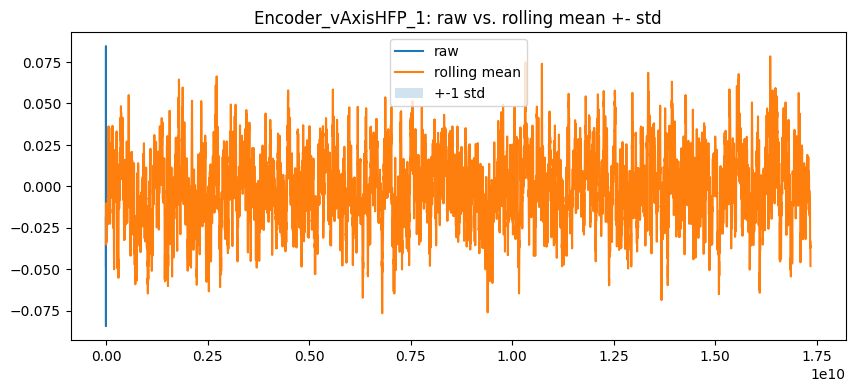

In [10]:
window = 10

# Compute rolling mean and std for all sensors:
rolling_mean = df2.rolling(window=window, min_periods=1, center=False, on='Time').mean()
rolling_std = df2.rolling(window=window, min_periods=1, center=False, on='Time').std()

#  Other aggregations:
rolling_median = df2.rolling(window, min_periods=1, on='Time').median()
rolling_quantile = df2.rolling(window, min_periods=1, on='Time').quantile(0.95)
rolling_var = df2.rolling(window, min_periods=1, on='Time').var()

# 5. Visualize one sensor’s raw vs. rolling-mean/±std
sensor = 'Encoder_vAxisHFP_1'
plt.figure(figsize=(10,4))
plt.plot(df2.index, df2[sensor], label='raw')
plt.plot(rolling_mean['Time'], rolling_mean[sensor], label='rolling mean')
plt.fill_between(rolling_mean.index,
                 rolling_mean[sensor] - rolling_std[sensor],
                 rolling_mean[sensor] + rolling_std[sensor],
                 alpha=0.2, label='+-1 std')
plt.legend()
plt.title(f"{sensor}: raw vs. rolling mean +- std")
plt.show()

In [11]:
qs = [0.01, 0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]
quantiles = df2['Time'].quantile(qs)

print(quantiles)

0.01   0 days 00:00:00.173440
0.05   0 days 00:00:00.867200
0.10   0 days 00:00:01.734400
0.25   0 days 00:00:04.336000
0.50   0 days 00:00:08.672000
0.75   0 days 00:00:13.008000
0.90   0 days 00:00:15.609600
0.95   0 days 00:00:16.476800
0.99   0 days 00:00:17.170560
Name: Time, dtype: timedelta64[ns]


In [12]:
lower, upper = quantiles.loc[0.01], quantiles.loc[0.99]
anomalies = df2[(df2['Time'] < lower) | (df2['Time'] > upper)]

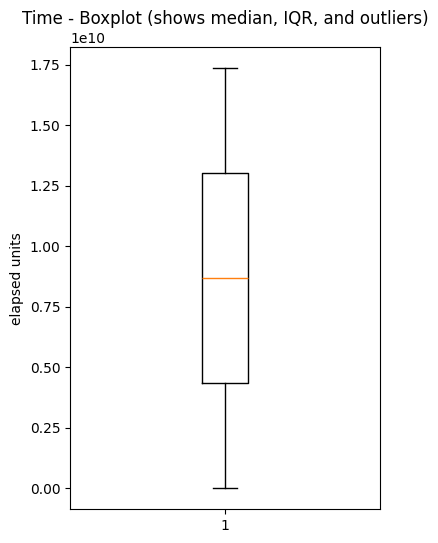

In [13]:
plt.figure(figsize=(4,6))
plt.boxplot(df2['Time'], vert=True, showfliers=True)
plt.title("Time - Boxplot (shows median, IQR, and outliers)")
plt.ylabel("elapsed units")
plt.show()

<Figure size 1200x1200 with 0 Axes>

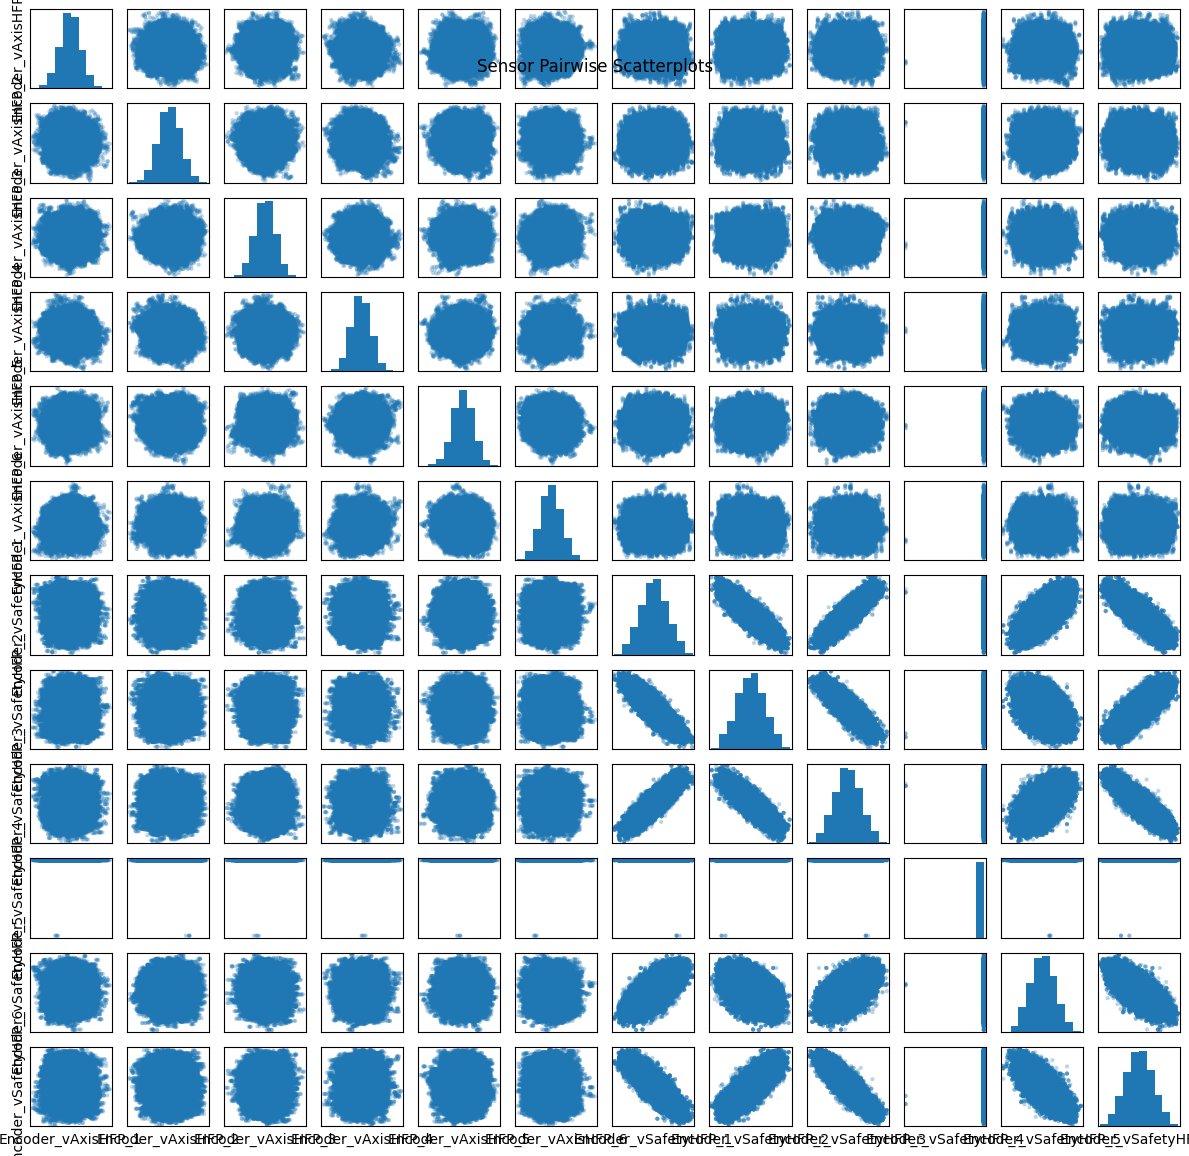

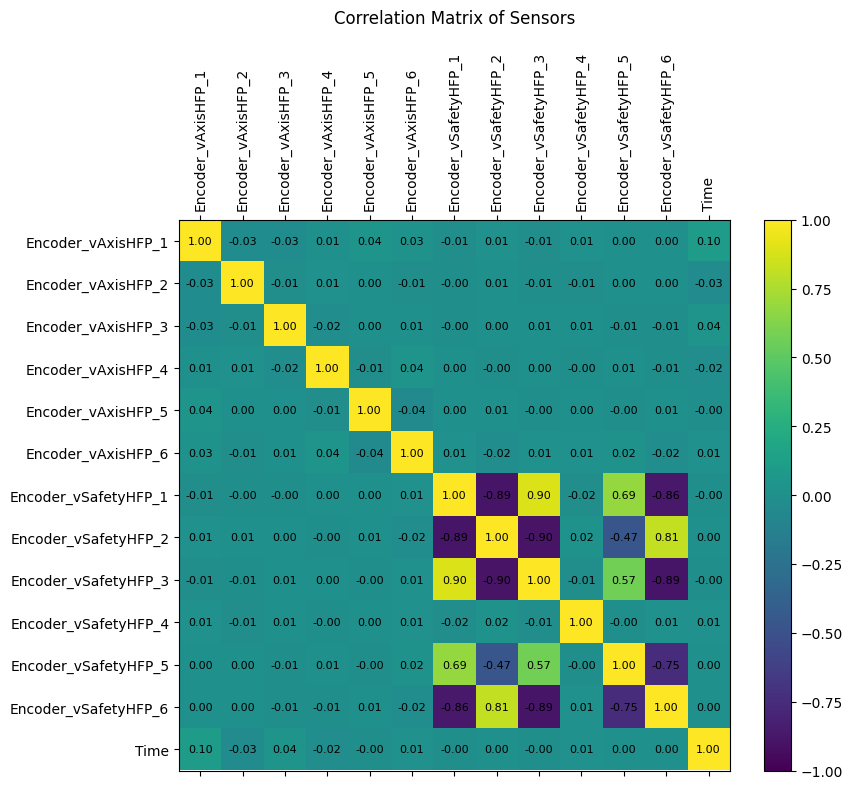

In [14]:
fig = plt.figure(figsize=(12, 12))
axes = scatter_matrix(df2, alpha=0.3, diagonal='hist', figsize=(12, 12))

for ax in axes.flatten():
    ax.set_xticks([])
    ax.set_yticks([])

plt.suptitle("Sensor Pairwise Scatterplots", y=0.92)
plt.tight_layout()
plt.show()


# Correlation Matrix Heatmap
corr = df2.corr() 

fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.matshow(corr, vmin=-1, vmax=1)
fig.colorbar(cax, fraction=0.046, pad=0.04)

# set up ticks and labels
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns, rotation=90)
ax.set_yticklabels(corr.columns)

# annotate each cell with the correlation value
for (i, j), val in np.ndenumerate(corr.values):
    ax.text(j, i, f"{val:.2f}", ha='center', va='center', fontsize=8)

plt.title("Correlation Matrix of Sensors", pad=20)
plt.tight_layout()
plt.show()

In [15]:
df2.iloc[:, 0:6]

,Encoder_vAxisHFP_1,Encoder_vAxisHFP_2,Encoder_vAxisHFP_3,Encoder_vAxisHFP_4,Encoder_vAxisHFP_5,Encoder_vAxisHFP_6
0,-0.018964,-0.025433,0.008373,0.001387,-0.014673,0.010472
1,-0.025091,-0.021360,0.007988,-0.001536,-0.008852,0.002152
2,-0.026657,-0.021689,0.007212,-0.000004,-0.005338,-0.005628
3,-0.023970,-0.019123,0.009580,-0.001420,-0.002740,-0.009748
4,-0.027541,-0.020061,0.001411,0.006533,-0.010312,-0.012460
...,...,...,...,...,...,...
69372,-0.051699,0.026350,-0.006039,0.006080,0.003177,-0.006495
69373,-0.050102,0.028398,-0.003191,0.004777,0.001695,-0.005116
69374,-0.049127,0.030216,-0.008300,0.005271,0.001880,-0.006173
69375,-0.049820,0.028099,-0.012014,0.004490,0.010230,-0.010393


<Figure size 1200x1200 with 0 Axes>

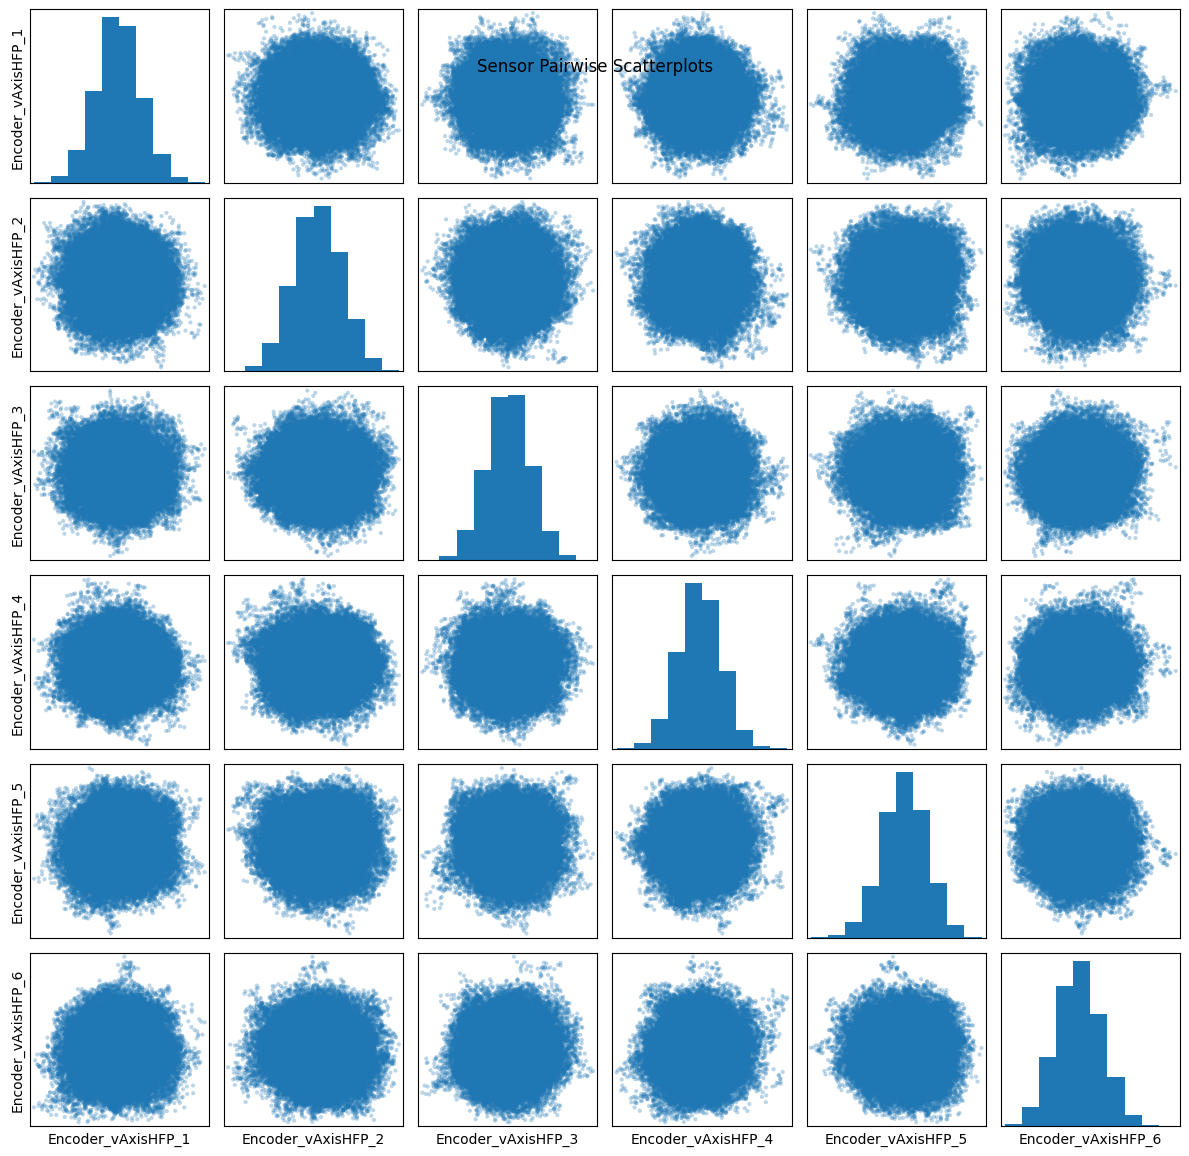

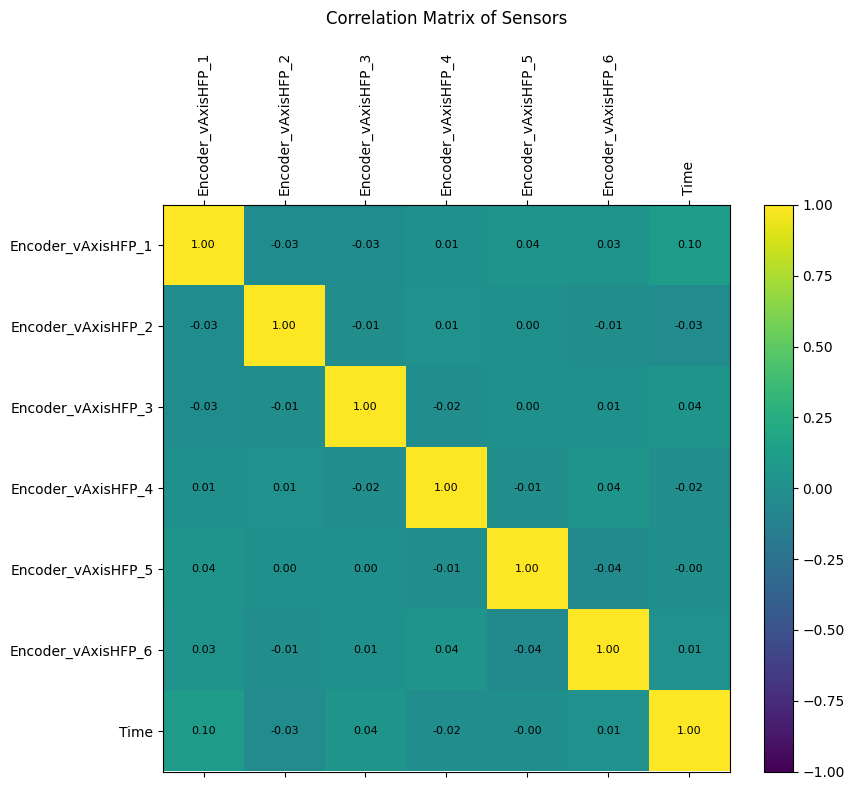

In [16]:
df2_axis = df2.iloc[:, 0:6].copy()
df2_axis['Time'] = df2['Time']
fig = plt.figure(figsize=(12, 12))
axes = scatter_matrix(df2_axis, alpha=0.3, diagonal='hist', figsize=(12, 12))

for ax in axes.flatten():
    ax.set_xticks([])
    ax.set_yticks([])

plt.suptitle("Sensor Pairwise Scatterplots", y=0.92)
plt.tight_layout()
plt.show()


# Correlation Matrix Heatmap
corr = df2_axis.corr() 

fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.matshow(corr, vmin=-1, vmax=1)
fig.colorbar(cax, fraction=0.046, pad=0.04)

# set up ticks and labels
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns, rotation=90)
ax.set_yticklabels(corr.columns)

# annotate each cell with the correlation value
for (i, j), val in np.ndenumerate(corr.values):
    ax.text(j, i, f"{val:.2f}", ha='center', va='center', fontsize=8)

plt.title("Correlation Matrix of Sensors", pad=20)
plt.tight_layout()
plt.show()

<Figure size 1200x1200 with 0 Axes>

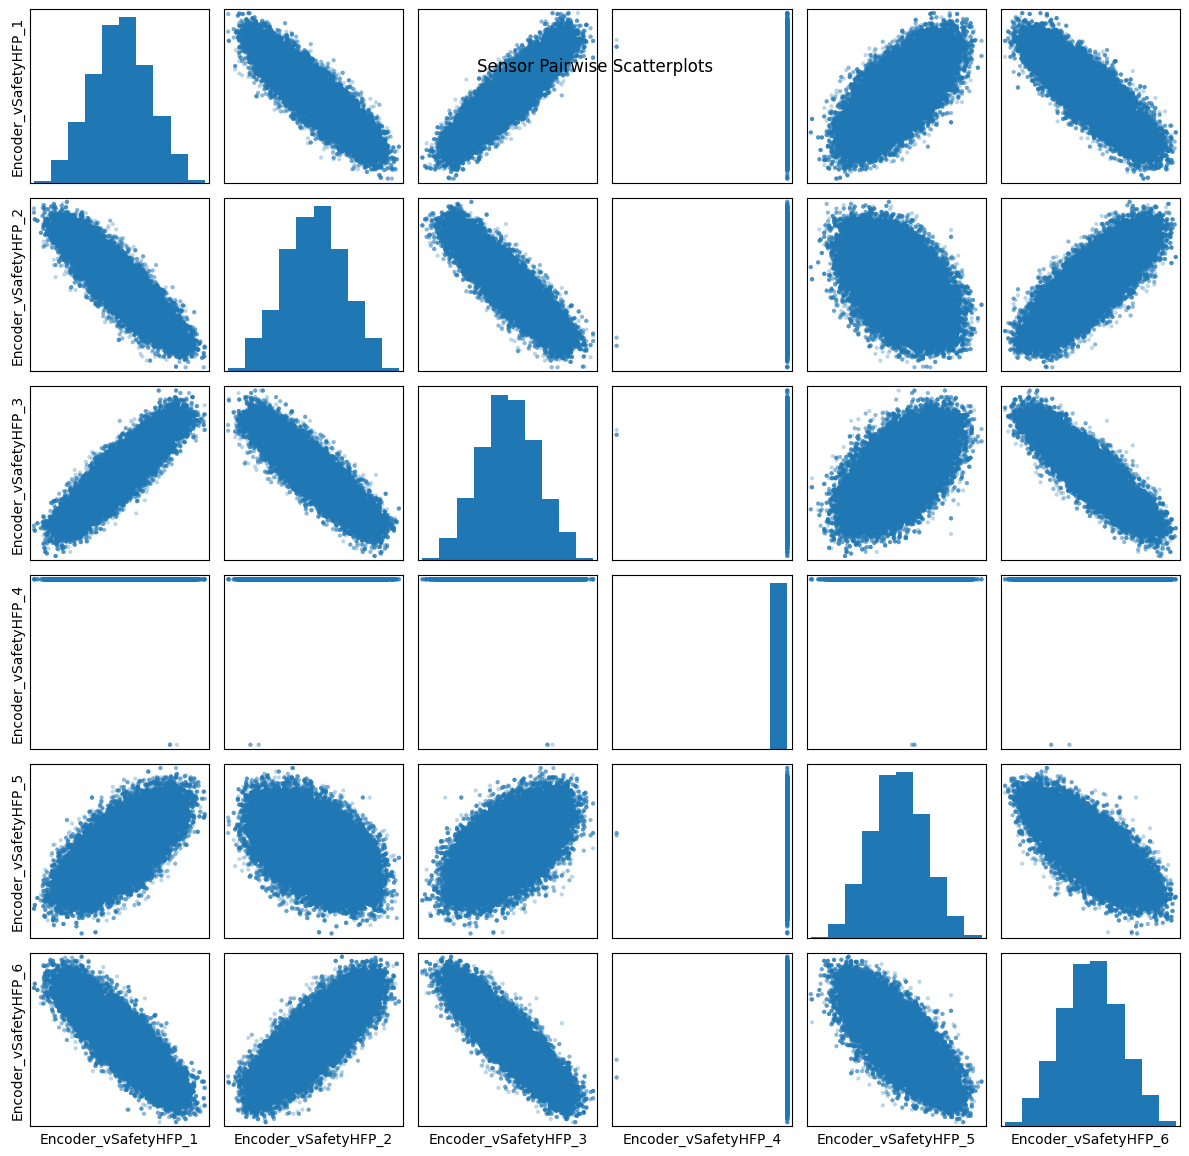

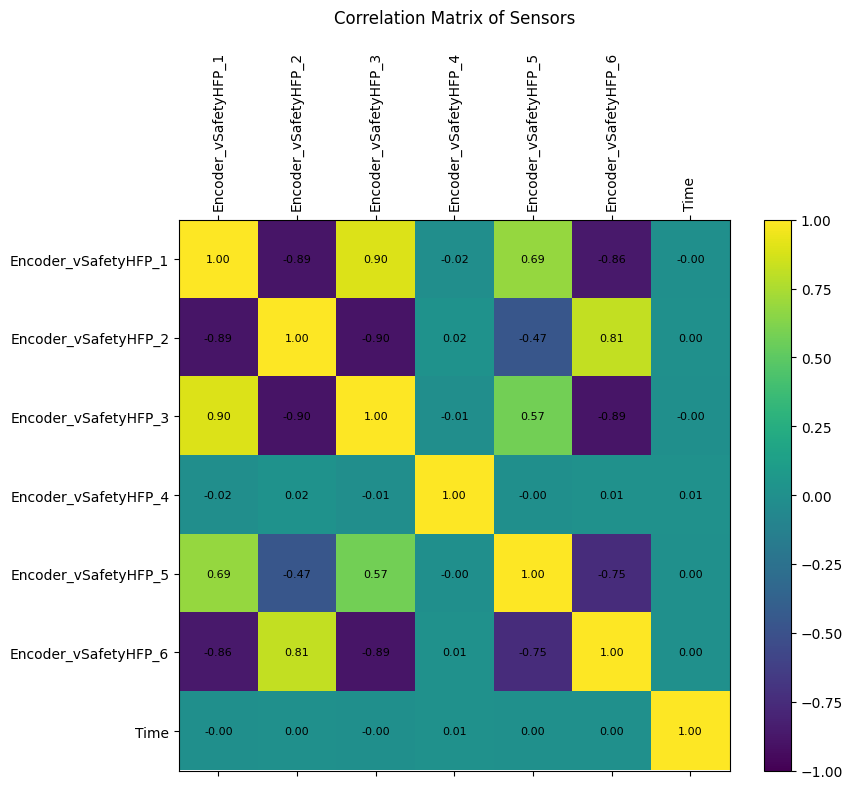

In [17]:
df2_safety = df2.iloc[:, 6:].copy()
df2_safety['Time'] = df2['Time']
fig = plt.figure(figsize=(12, 12))
axes = scatter_matrix(df2_safety, alpha=0.3, diagonal='hist', figsize=(12, 12))

for ax in axes.flatten():
    ax.set_xticks([])
    ax.set_yticks([])

plt.suptitle("Sensor Pairwise Scatterplots", y=0.92)
plt.tight_layout()
plt.show()


# Correlation Matrix Heatmap
corr = df2_safety.corr() 

fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.matshow(corr, vmin=-1, vmax=1)
fig.colorbar(cax, fraction=0.046, pad=0.04)

# set up ticks and labels
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns, rotation=90)
ax.set_yticklabels(corr.columns)

# annotate each cell with the correlation value
for (i, j), val in np.ndenumerate(corr.values):
    ax.text(j, i, f"{val:.2f}", ha='center', va='center', fontsize=8)

plt.title("Correlation Matrix of Sensors", pad=20)
plt.tight_layout()
plt.show()

## Dataset 3: Wushu Yaw Trapezoid (Normal)

In [41]:
df3 = pd.read_csv('./Datasets/Dataset03_Wushu_YawTrapezoidNormal.csv')

df3.head()

,State_xHFPW_1,State_xHFPW_2,State_xHFPW_3,State_xHFPW_4,State_xHFPW_5,State_xHFPW_6,State_vHFPW_1,State_vHFPW_2,State_vHFPW_3,State_vHFPW_4,...,Force_FAxisLFP3_Demand_8,Force_FAxisLFP3_Measured_1,Force_FAxisLFP3_Measured_2,Force_FAxisLFP3_Measured_3,Force_FAxisLFP3_Measured_4,Force_FAxisLFP3_Measured_5,Force_FAxisLFP3_Measured_6,Force_FAxisLFP3_Measured_7,Force_FAxisLFP3_Measured_8,Time
0,1.000372,0.000259,0.000841,0.000962,0.000581,-7.634434,0.000254,0.000069,0.000122,0.000141,...,-40.59336,-45.59387,-41.03455,-41.03455,-57.75226,-48.63348,-47.11371,-45.59387,-42.55426,0.0000
1,1.000372,0.000259,0.000841,0.000962,0.000581,-7.634486,0.000196,0.000056,0.000087,0.000102,...,-40.92985,-41.03455,-39.51471,-37.99493,-54.71265,-48.63348,-47.11371,-44.07410,-44.07410,0.0005
2,1.000372,0.000259,0.000841,0.000962,0.000581,-7.634537,0.000104,0.000043,0.000065,0.000071,...,-40.50022,-42.55426,-42.55426,-37.99493,-51.67310,-47.11371,-50.15332,-44.07410,-44.07410,0.0010
3,1.000372,0.000259,0.000841,0.000962,0.000581,-7.634589,0.000073,-0.000050,0.000060,0.000101,...,-41.82842,-42.55426,-41.03455,-37.99493,-53.19287,-48.63348,-50.15332,-41.03455,-42.55426,0.0015
4,1.000372,0.000259,0.000841,0.000962,0.000581,-7.634641,0.000053,0.000058,0.000106,0.000034,...,-43.88425,-39.51471,-41.03455,-37.99493,-56.23248,-45.59387,-48.63348,-44.07410,-41.03455,0.0020


In [42]:
df3['Time'] = pd.to_timedelta(df3['Time'], unit='s')

In [43]:
df3.isna().sum().any()

np.False_

In [44]:
# means_df = {}
# std_df = {}
# for col_name, col_val in df3.items():
#     means = df3[col_name].mean().compute(assume_missing=True)
#     stds = df3.col_name.std().compute()
#     means_df[col_name] = means
#     std_df[col_name] = stds
# means = pd.Series(means_df)
# stds = pd.Series(std_df)

# # Correlation matrix
# corr = df3.corr().compute()

# # Sample a small fraction of the data for visualization
# sample = df3.sample(frac=0.01).compute()
# # Visualize the means and standard deviations
# plt.figure(figsize=(12, 6))
# plt.subplot(1, 2, 1)
# plt.bar(means.index, means.values, color='blue', alpha=0.6) 
# plt.title("Means of Sensors")
# plt.xticks(rotation=90)
# plt.subplot(1, 2, 2)
# plt.bar(stds.index, stds.values, color='orange', alpha=0.6)
# plt.title("Standard Deviations of Sensors")
# plt.xticks(rotation=90)
# plt.tight_layout()

# # Visualize the correlation matrix
# plt.figure(figsize=(10, 8))
# sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
# plt.title("Correlation Matrix of Dask DataFrame", pad=20)
# # Pairplot using seaborn
# sns.pairplot(sample, diag_kind='hist', markers='o', plot_kws={'alpha': 0.3})
# # Scatter matrix using pandas
# from pandas.plotting import scatter_matrix
# scatter_matrix(sample, diagonal='hist', alpha=0.3)

# sample = df3.sample(frac=0.01)

# fig = plt.figure(figsize=(12, 12))
# axes = scatter_matrix(sample, alpha=0.3, diagonal='hist', figsize=(12, 12))

# for ax in axes.flatten():
#     ax.set_xticks([])
#     ax.set_yticks([])

# plt.suptitle("Sensor Pairwise Scatterplots", y=0.92)
# plt.tight_layout()
# plt.show()


# # Correlation Matrix Heatmap
# corr = df3.corr() 

# fig, ax = plt.subplots(figsize=(10, 8))
# cax = ax.matshow(corr, vmin=-1, vmax=1)
# fig.colorbar(cax, fraction=0.046, pad=0.04)

# # set up ticks and labels
# ax.set_xticks(np.arange(len(corr.columns)))
# ax.set_yticks(np.arange(len(corr.columns)))
# ax.set_xticklabels(corr.columns, rotation=90)
# ax.set_yticklabels(corr.columns)

# # annotate each cell with the correlation value
# for (i, j), val in np.ndenumerate(corr.values):
#     ax.text(j, i, f"{val:.2f}", ha='center', va='center', fontsize=8)

# plt.title("Correlation Matrix of Sensors", pad=20)
# plt.tight_layout()
# plt.show()

### Trying PySpark

In [45]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("RollingStatistics").getOrCreate()

In [46]:
from pyspark.sql.functions import col, to_timestamp

df = spark.read.csv('Datasets\Dataset03_Wushu_YawTrapezoidNormal.csv', header=True, inferSchema=True)
df = df.withColumn('timestamp', to_timestamp('Time', 's'))


Py4JJavaError: An error occurred while calling o41.csv.
: java.nio.file.NoSuchFileException: C:\Users\ashut\AppData\Local\Temp\blockmgr-41889223-7ab9-494b-b796-61283c425e85\0a
	at java.base/sun.nio.fs.WindowsException.translateToIOException(WindowsException.java:85)
	at java.base/sun.nio.fs.WindowsException.rethrowAsIOException(WindowsException.java:103)
	at java.base/sun.nio.fs.WindowsException.rethrowAsIOException(WindowsException.java:108)
	at java.base/sun.nio.fs.WindowsFileSystemProvider.createDirectory(WindowsFileSystemProvider.java:527)
	at java.base/java.nio.file.Files.createDirectory(Files.java:699)
	at org.apache.spark.storage.DiskBlockManager.getFile(DiskBlockManager.scala:110)
	at org.apache.spark.storage.DiskStore.remove(DiskStore.scala:134)
	at org.apache.spark.storage.BlockManager.removeBlockInternal(BlockManager.scala:2119)
	at org.apache.spark.storage.BlockManager.org$apache$spark$storage$BlockManager$$doPut(BlockManager.scala:1588)
	at org.apache.spark.storage.BlockManager.doPutIterator(BlockManager.scala:1625)
	at org.apache.spark.storage.BlockManager.putIterator(BlockManager.scala:1460)
	at org.apache.spark.storage.BlockManager.putSingle(BlockManager.scala:1965)
	at org.apache.spark.broadcast.TorrentBroadcast.writeBlocks(TorrentBroadcast.scala:155)
	at org.apache.spark.broadcast.TorrentBroadcast.<init>(TorrentBroadcast.scala:100)
	at org.apache.spark.broadcast.TorrentBroadcastFactory.newBroadcast(TorrentBroadcastFactory.scala:38)
	at org.apache.spark.broadcast.BroadcastManager.newBroadcast(BroadcastManager.scala:78)
	at org.apache.spark.SparkContext.broadcastInternal(SparkContext.scala:1728)
	at org.apache.spark.SparkContext.broadcast(SparkContext.scala:1710)
	at org.apache.spark.sql.execution.datasources.text.TextFileFormat.buildReader(TextFileFormat.scala:110)
	at org.apache.spark.sql.execution.datasources.FileFormat.buildReaderWithPartitionValues(FileFormat.scala:138)
	at org.apache.spark.sql.execution.datasources.FileFormat.buildReaderWithPartitionValues$(FileFormat.scala:129)
	at org.apache.spark.sql.execution.datasources.TextBasedFileFormat.buildReaderWithPartitionValues(FileFormat.scala:352)
	at org.apache.spark.sql.execution.FileSourceScanExec.inputRDD$lzycompute(DataSourceScanExec.scala:650)
	at org.apache.spark.sql.execution.FileSourceScanExec.inputRDD(DataSourceScanExec.scala:639)
	at org.apache.spark.sql.execution.FileSourceScanExec.doExecute(DataSourceScanExec.scala:677)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$executeRDD$1(SparkPlan.scala:188)
	at scala.util.Try$.apply(Try.scala:217)
	at org.apache.spark.util.Utils$.doTryWithCallerStacktrace(Utils.scala:1378)
	at org.apache.spark.util.LazyTry.tryT$lzycompute(LazyTry.scala:46)
	at org.apache.spark.util.LazyTry.tryT(LazyTry.scala:46)
	at org.apache.spark.util.LazyTry.get(LazyTry.scala:58)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$execute$1(SparkPlan.scala:201)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$executeQuery$1(SparkPlan.scala:260)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.sql.execution.SparkPlan.executeQuery(SparkPlan.scala:257)
	at org.apache.spark.sql.execution.SparkPlan.execute(SparkPlan.scala:197)
	at org.apache.spark.sql.execution.InputAdapter.inputRDD(WholeStageCodegenExec.scala:533)
	at org.apache.spark.sql.execution.InputRDDCodegen.inputRDDs(WholeStageCodegenExec.scala:461)
	at org.apache.spark.sql.execution.InputRDDCodegen.inputRDDs$(WholeStageCodegenExec.scala:460)
	at org.apache.spark.sql.execution.InputAdapter.inputRDDs(WholeStageCodegenExec.scala:504)
	at org.apache.spark.sql.execution.FilterExec.inputRDDs(basicPhysicalOperators.scala:242)
	at org.apache.spark.sql.execution.WholeStageCodegenExec.doExecute(WholeStageCodegenExec.scala:761)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$executeRDD$1(SparkPlan.scala:188)
	at scala.util.Try$.apply(Try.scala:217)
	at org.apache.spark.util.Utils$.doTryWithCallerStacktrace(Utils.scala:1378)
	at org.apache.spark.util.LazyTry.tryT$lzycompute(LazyTry.scala:46)
	at org.apache.spark.util.LazyTry.tryT(LazyTry.scala:46)
	at org.apache.spark.util.LazyTry.get(LazyTry.scala:58)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$execute$1(SparkPlan.scala:201)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$executeQuery$1(SparkPlan.scala:260)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.sql.execution.SparkPlan.executeQuery(SparkPlan.scala:257)
	at org.apache.spark.sql.execution.SparkPlan.execute(SparkPlan.scala:197)
	at org.apache.spark.sql.execution.SparkPlan.getByteArrayRdd(SparkPlan.scala:378)
	at org.apache.spark.sql.execution.SparkPlan.executeTake(SparkPlan.scala:512)
	at org.apache.spark.sql.execution.SparkPlan.executeTake(SparkPlan.scala:497)
	at org.apache.spark.sql.execution.CollectLimitExec.executeCollect(limit.scala:58)
	at org.apache.spark.sql.classic.Dataset.collectFromPlan(Dataset.scala:2244)
	at org.apache.spark.sql.classic.Dataset.$anonfun$head$1(Dataset.scala:1379)
	at org.apache.spark.sql.classic.Dataset.$anonfun$withAction$2(Dataset.scala:2234)
	at org.apache.spark.sql.execution.QueryExecution$.withInternalError(QueryExecution.scala:654)
	at org.apache.spark.sql.classic.Dataset.$anonfun$withAction$1(Dataset.scala:2232)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId0$8(SQLExecution.scala:162)
	at org.apache.spark.sql.execution.SQLExecution$.withSessionTagsApplied(SQLExecution.scala:268)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId0$7(SQLExecution.scala:124)
	at org.apache.spark.JobArtifactSet$.withActiveJobArtifactState(JobArtifactSet.scala:94)
	at org.apache.spark.sql.artifact.ArtifactManager.$anonfun$withResources$1(ArtifactManager.scala:112)
	at org.apache.spark.sql.artifact.ArtifactManager.withClassLoaderIfNeeded(ArtifactManager.scala:106)
	at org.apache.spark.sql.artifact.ArtifactManager.withResources(ArtifactManager.scala:111)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId0$6(SQLExecution.scala:124)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:291)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId0$1(SQLExecution.scala:123)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:804)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId0(SQLExecution.scala:77)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:233)
	at org.apache.spark.sql.classic.Dataset.withAction(Dataset.scala:2232)
	at org.apache.spark.sql.classic.Dataset.head(Dataset.scala:1379)
	at org.apache.spark.sql.Dataset.take(Dataset.scala:2810)
	at org.apache.spark.sql.execution.datasources.csv.TextInputCSVDataSource$.infer(CSVDataSource.scala:121)
	at org.apache.spark.sql.execution.datasources.csv.CSVDataSource.inferSchema(CSVDataSource.scala:72)
	at org.apache.spark.sql.execution.datasources.csv.CSVFileFormat.inferSchema(CSVFileFormat.scala:63)
	at org.apache.spark.sql.execution.datasources.DataSource.$anonfun$getOrInferFileFormatSchema$11(DataSource.scala:219)
	at scala.Option.orElse(Option.scala:477)
	at org.apache.spark.sql.execution.datasources.DataSource.getOrInferFileFormatSchema(DataSource.scala:216)
	at org.apache.spark.sql.execution.datasources.DataSource.resolveRelation(DataSource.scala:422)
	at org.apache.spark.sql.catalyst.analysis.ResolveDataSource.org$apache$spark$sql$catalyst$analysis$ResolveDataSource$$loadV1BatchSource(ResolveDataSource.scala:143)
	at org.apache.spark.sql.catalyst.analysis.ResolveDataSource$$anonfun$apply$1.$anonfun$applyOrElse$2(ResolveDataSource.scala:61)
	at scala.Option.getOrElse(Option.scala:201)
	at org.apache.spark.sql.catalyst.analysis.ResolveDataSource$$anonfun$apply$1.applyOrElse(ResolveDataSource.scala:61)
	at org.apache.spark.sql.catalyst.analysis.ResolveDataSource$$anonfun$apply$1.applyOrElse(ResolveDataSource.scala:45)
	at org.apache.spark.sql.catalyst.plans.logical.AnalysisHelper.$anonfun$resolveOperatorsUpWithPruning$3(AnalysisHelper.scala:139)
	at org.apache.spark.sql.catalyst.trees.CurrentOrigin$.withOrigin(origin.scala:86)
	at org.apache.spark.sql.catalyst.plans.logical.AnalysisHelper.$anonfun$resolveOperatorsUpWithPruning$1(AnalysisHelper.scala:139)
	at org.apache.spark.sql.catalyst.plans.logical.AnalysisHelper$.allowInvokingTransformsInAnalyzer(AnalysisHelper.scala:416)
	at org.apache.spark.sql.catalyst.plans.logical.AnalysisHelper.resolveOperatorsUpWithPruning(AnalysisHelper.scala:135)
	at org.apache.spark.sql.catalyst.plans.logical.AnalysisHelper.resolveOperatorsUpWithPruning$(AnalysisHelper.scala:131)
	at org.apache.spark.sql.catalyst.plans.logical.LogicalPlan.resolveOperatorsUpWithPruning(LogicalPlan.scala:37)
	at org.apache.spark.sql.catalyst.plans.logical.AnalysisHelper.resolveOperatorsUp(AnalysisHelper.scala:112)
	at org.apache.spark.sql.catalyst.plans.logical.AnalysisHelper.resolveOperatorsUp$(AnalysisHelper.scala:111)
	at org.apache.spark.sql.catalyst.plans.logical.LogicalPlan.resolveOperatorsUp(LogicalPlan.scala:37)
	at org.apache.spark.sql.catalyst.analysis.ResolveDataSource.apply(ResolveDataSource.scala:45)
	at org.apache.spark.sql.catalyst.analysis.ResolveDataSource.apply(ResolveDataSource.scala:43)
	at org.apache.spark.sql.catalyst.rules.RuleExecutor.$anonfun$execute$2(RuleExecutor.scala:242)
	at scala.collection.LinearSeqOps.foldLeft(LinearSeq.scala:183)
	at scala.collection.LinearSeqOps.foldLeft$(LinearSeq.scala:179)
	at scala.collection.immutable.List.foldLeft(List.scala:79)
	at org.apache.spark.sql.catalyst.rules.RuleExecutor.$anonfun$execute$1(RuleExecutor.scala:239)
	at org.apache.spark.sql.catalyst.rules.RuleExecutor.$anonfun$execute$1$adapted(RuleExecutor.scala:231)
	at scala.collection.immutable.List.foreach(List.scala:334)
	at org.apache.spark.sql.catalyst.rules.RuleExecutor.execute(RuleExecutor.scala:231)
	at org.apache.spark.sql.catalyst.analysis.Analyzer.org$apache$spark$sql$catalyst$analysis$Analyzer$$executeSameContext(Analyzer.scala:290)
	at org.apache.spark.sql.catalyst.analysis.Analyzer.$anonfun$execute$1(Analyzer.scala:286)
	at org.apache.spark.sql.catalyst.analysis.AnalysisContext$.withNewAnalysisContext(Analyzer.scala:234)
	at org.apache.spark.sql.catalyst.analysis.Analyzer.execute(Analyzer.scala:286)
	at org.apache.spark.sql.catalyst.analysis.Analyzer.execute(Analyzer.scala:249)
	at org.apache.spark.sql.catalyst.rules.RuleExecutor.$anonfun$executeAndTrack$1(RuleExecutor.scala:201)
	at org.apache.spark.sql.catalyst.QueryPlanningTracker$.withTracker(QueryPlanningTracker.scala:89)
	at org.apache.spark.sql.catalyst.rules.RuleExecutor.executeAndTrack(RuleExecutor.scala:201)
	at org.apache.spark.sql.catalyst.analysis.resolver.HybridAnalyzer.resolveInFixedPoint(HybridAnalyzer.scala:190)
	at org.apache.spark.sql.catalyst.analysis.resolver.HybridAnalyzer.$anonfun$apply$1(HybridAnalyzer.scala:76)
	at org.apache.spark.sql.catalyst.analysis.resolver.HybridAnalyzer.withTrackedAnalyzerBridgeState(HybridAnalyzer.scala:111)
	at org.apache.spark.sql.catalyst.analysis.resolver.HybridAnalyzer.apply(HybridAnalyzer.scala:71)
	at org.apache.spark.sql.catalyst.analysis.Analyzer.$anonfun$executeAndCheck$1(Analyzer.scala:280)
	at org.apache.spark.sql.catalyst.plans.logical.AnalysisHelper$.markInAnalyzer(AnalysisHelper.scala:423)
	at org.apache.spark.sql.catalyst.analysis.Analyzer.executeAndCheck(Analyzer.scala:280)
	at org.apache.spark.sql.execution.QueryExecution.$anonfun$lazyAnalyzed$2(QueryExecution.scala:110)
	at org.apache.spark.sql.catalyst.QueryPlanningTracker.measurePhase(QueryPlanningTracker.scala:148)
	at org.apache.spark.sql.execution.QueryExecution.$anonfun$executePhase$2(QueryExecution.scala:278)
	at org.apache.spark.sql.execution.QueryExecution$.withInternalError(QueryExecution.scala:654)
	at org.apache.spark.sql.execution.QueryExecution.$anonfun$executePhase$1(QueryExecution.scala:278)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:804)
	at org.apache.spark.sql.execution.QueryExecution.executePhase(QueryExecution.scala:277)
	at org.apache.spark.sql.execution.QueryExecution.$anonfun$lazyAnalyzed$1(QueryExecution.scala:110)
	at org.apache.spark.util.Utils$.getTryWithCallerStacktrace(Utils.scala:1439)
	at org.apache.spark.util.LazyTry.get(LazyTry.scala:58)
	at org.apache.spark.sql.execution.QueryExecution.analyzed(QueryExecution.scala:121)
	at org.apache.spark.sql.execution.QueryExecution.assertAnalyzed(QueryExecution.scala:80)
	at org.apache.spark.sql.classic.Dataset$.$anonfun$ofRows$1(Dataset.scala:115)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:804)
	at org.apache.spark.sql.classic.Dataset$.ofRows(Dataset.scala:113)
	at org.apache.spark.sql.classic.DataFrameReader.load(DataFrameReader.scala:109)
	at org.apache.spark.sql.classic.DataFrameReader.load(DataFrameReader.scala:58)
	at org.apache.spark.sql.DataFrameReader.csv(DataFrameReader.scala:392)
	at org.apache.spark.sql.classic.DataFrameReader.csv(DataFrameReader.scala:259)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:75)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:52)
	at java.base/java.lang.reflect.Method.invoke(Method.java:580)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:184)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:108)
	at java.base/java.lang.Thread.run(Thread.java:1583)
	Suppressed: org.apache.spark.util.Utils$OriginalTryStackTraceException: Full stacktrace of original doTryWithCallerStacktrace caller
		at java.base/sun.nio.fs.WindowsException.translateToIOException(WindowsException.java:85)
		at java.base/sun.nio.fs.WindowsException.rethrowAsIOException(WindowsException.java:103)
		at java.base/sun.nio.fs.WindowsException.rethrowAsIOException(WindowsException.java:108)
		at java.base/sun.nio.fs.WindowsFileSystemProvider.createDirectory(WindowsFileSystemProvider.java:527)
		at java.base/java.nio.file.Files.createDirectory(Files.java:699)
		at org.apache.spark.storage.DiskBlockManager.getFile(DiskBlockManager.scala:110)
		at org.apache.spark.storage.DiskStore.remove(DiskStore.scala:134)
		at org.apache.spark.storage.BlockManager.removeBlockInternal(BlockManager.scala:2119)
		at org.apache.spark.storage.BlockManager.org$apache$spark$storage$BlockManager$$doPut(BlockManager.scala:1588)
		at org.apache.spark.storage.BlockManager.doPutIterator(BlockManager.scala:1625)
		at org.apache.spark.storage.BlockManager.putIterator(BlockManager.scala:1460)
		at org.apache.spark.storage.BlockManager.putSingle(BlockManager.scala:1965)
		at org.apache.spark.broadcast.TorrentBroadcast.writeBlocks(TorrentBroadcast.scala:155)
		at org.apache.spark.broadcast.TorrentBroadcast.<init>(TorrentBroadcast.scala:100)
		at org.apache.spark.broadcast.TorrentBroadcastFactory.newBroadcast(TorrentBroadcastFactory.scala:38)
		at org.apache.spark.broadcast.BroadcastManager.newBroadcast(BroadcastManager.scala:78)
		at org.apache.spark.SparkContext.broadcastInternal(SparkContext.scala:1728)
		at org.apache.spark.SparkContext.broadcast(SparkContext.scala:1710)
		at org.apache.spark.sql.execution.datasources.text.TextFileFormat.buildReader(TextFileFormat.scala:110)
		at org.apache.spark.sql.execution.datasources.FileFormat.buildReaderWithPartitionValues(FileFormat.scala:138)
		at org.apache.spark.sql.execution.datasources.FileFormat.buildReaderWithPartitionValues$(FileFormat.scala:129)
		at org.apache.spark.sql.execution.datasources.TextBasedFileFormat.buildReaderWithPartitionValues(FileFormat.scala:352)
		at org.apache.spark.sql.execution.FileSourceScanExec.inputRDD$lzycompute(DataSourceScanExec.scala:650)
		at org.apache.spark.sql.execution.FileSourceScanExec.inputRDD(DataSourceScanExec.scala:639)
		at org.apache.spark.sql.execution.FileSourceScanExec.doExecute(DataSourceScanExec.scala:677)
		at org.apache.spark.sql.execution.SparkPlan.$anonfun$executeRDD$1(SparkPlan.scala:188)
		at scala.util.Try$.apply(Try.scala:217)
		at org.apache.spark.util.Utils$.doTryWithCallerStacktrace(Utils.scala:1378)
		at org.apache.spark.util.LazyTry.tryT$lzycompute(LazyTry.scala:46)
		at org.apache.spark.util.LazyTry.tryT(LazyTry.scala:46)
		at org.apache.spark.util.LazyTry.get(LazyTry.scala:58)
		at org.apache.spark.sql.execution.SparkPlan.$anonfun$execute$1(SparkPlan.scala:201)
		at org.apache.spark.sql.execution.SparkPlan.$anonfun$executeQuery$1(SparkPlan.scala:260)
		at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
		at org.apache.spark.sql.execution.SparkPlan.executeQuery(SparkPlan.scala:257)
		at org.apache.spark.sql.execution.SparkPlan.execute(SparkPlan.scala:197)
		at org.apache.spark.sql.execution.InputAdapter.inputRDD(WholeStageCodegenExec.scala:533)
		at org.apache.spark.sql.execution.InputRDDCodegen.inputRDDs(WholeStageCodegenExec.scala:461)
		at org.apache.spark.sql.execution.InputRDDCodegen.inputRDDs$(WholeStageCodegenExec.scala:460)
		at org.apache.spark.sql.execution.InputAdapter.inputRDDs(WholeStageCodegenExec.scala:504)
		at org.apache.spark.sql.execution.FilterExec.inputRDDs(basicPhysicalOperators.scala:242)
		at org.apache.spark.sql.execution.WholeStageCodegenExec.doExecute(WholeStageCodegenExec.scala:761)
		at org.apache.spark.sql.execution.SparkPlan.$anonfun$executeRDD$1(SparkPlan.scala:188)
		at scala.util.Try$.apply(Try.scala:217)
		at org.apache.spark.util.Utils$.doTryWithCallerStacktrace(Utils.scala:1378)
		at org.apache.spark.util.LazyTry.tryT$lzycompute(LazyTry.scala:46)
		at org.apache.spark.util.LazyTry.tryT(LazyTry.scala:46)
		at org.apache.spark.util.LazyTry.get(LazyTry.scala:58)
		at org.apache.spark.sql.execution.SparkPlan.$anonfun$execute$1(SparkPlan.scala:201)
		at org.apache.spark.sql.execution.SparkPlan.$anonfun$executeQuery$1(SparkPlan.scala:260)
		at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
		at org.apache.spark.sql.execution.SparkPlan.executeQuery(SparkPlan.scala:257)
		at org.apache.spark.sql.execution.SparkPlan.execute(SparkPlan.scala:197)
		at org.apache.spark.sql.execution.SparkPlan.getByteArrayRdd(SparkPlan.scala:378)
		at org.apache.spark.sql.execution.SparkPlan.executeTake(SparkPlan.scala:512)
		at org.apache.spark.sql.execution.SparkPlan.executeTake(SparkPlan.scala:497)
		at org.apache.spark.sql.execution.CollectLimitExec.executeCollect(limit.scala:58)
		at org.apache.spark.sql.classic.Dataset.collectFromPlan(Dataset.scala:2244)
		at org.apache.spark.sql.classic.Dataset.$anonfun$head$1(Dataset.scala:1379)
		at org.apache.spark.sql.classic.Dataset.$anonfun$withAction$2(Dataset.scala:2234)
		at org.apache.spark.sql.execution.QueryExecution$.withInternalError(QueryExecution.scala:654)
		at org.apache.spark.sql.classic.Dataset.$anonfun$withAction$1(Dataset.scala:2232)
		at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId0$8(SQLExecution.scala:162)
		at org.apache.spark.sql.execution.SQLExecution$.withSessionTagsApplied(SQLExecution.scala:268)
		at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId0$7(SQLExecution.scala:124)
		at org.apache.spark.JobArtifactSet$.withActiveJobArtifactState(JobArtifactSet.scala:94)
		at org.apache.spark.sql.artifact.ArtifactManager.$anonfun$withResources$1(ArtifactManager.scala:112)
		at org.apache.spark.sql.artifact.ArtifactManager.withClassLoaderIfNeeded(ArtifactManager.scala:106)
		at org.apache.spark.sql.artifact.ArtifactManager.withResources(ArtifactManager.scala:111)
		at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId0$6(SQLExecution.scala:124)
		at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:291)
		at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId0$1(SQLExecution.scala:123)
		at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:804)
		at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId0(SQLExecution.scala:77)
		at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:233)
		at org.apache.spark.sql.classic.Dataset.withAction(Dataset.scala:2232)
		at org.apache.spark.sql.classic.Dataset.head(Dataset.scala:1379)
		at org.apache.spark.sql.Dataset.take(Dataset.scala:2810)
		at org.apache.spark.sql.execution.datasources.csv.TextInputCSVDataSource$.infer(CSVDataSource.scala:121)
		at org.apache.spark.sql.execution.datasources.csv.CSVDataSource.inferSchema(CSVDataSource.scala:72)
		at org.apache.spark.sql.execution.datasources.csv.CSVFileFormat.inferSchema(CSVFileFormat.scala:63)
		at org.apache.spark.sql.execution.datasources.DataSource.$anonfun$getOrInferFileFormatSchema$11(DataSource.scala:219)
		at scala.Option.orElse(Option.scala:477)
		at org.apache.spark.sql.execution.datasources.DataSource.getOrInferFileFormatSchema(DataSource.scala:216)
		at org.apache.spark.sql.execution.datasources.DataSource.resolveRelation(DataSource.scala:422)
		at org.apache.spark.sql.catalyst.analysis.ResolveDataSource.org$apache$spark$sql$catalyst$analysis$ResolveDataSource$$loadV1BatchSource(ResolveDataSource.scala:143)
		at org.apache.spark.sql.catalyst.analysis.ResolveDataSource$$anonfun$apply$1.$anonfun$applyOrElse$2(ResolveDataSource.scala:61)
		at scala.Option.getOrElse(Option.scala:201)
		at org.apache.spark.sql.catalyst.analysis.ResolveDataSource$$anonfun$apply$1.applyOrElse(ResolveDataSource.scala:61)
		at org.apache.spark.sql.catalyst.analysis.ResolveDataSource$$anonfun$apply$1.applyOrElse(ResolveDataSource.scala:45)
		at org.apache.spark.sql.catalyst.plans.logical.AnalysisHelper.$anonfun$resolveOperatorsUpWithPruning$3(AnalysisHelper.scala:139)
		at org.apache.spark.sql.catalyst.trees.CurrentOrigin$.withOrigin(origin.scala:86)
		at org.apache.spark.sql.catalyst.plans.logical.AnalysisHelper.$anonfun$resolveOperatorsUpWithPruning$1(AnalysisHelper.scala:139)
		at org.apache.spark.sql.catalyst.plans.logical.AnalysisHelper$.allowInvokingTransformsInAnalyzer(AnalysisHelper.scala:416)
		at org.apache.spark.sql.catalyst.plans.logical.AnalysisHelper.resolveOperatorsUpWithPruning(AnalysisHelper.scala:135)
		at org.apache.spark.sql.catalyst.plans.logical.AnalysisHelper.resolveOperatorsUpWithPruning$(AnalysisHelper.scala:131)
		at org.apache.spark.sql.catalyst.plans.logical.LogicalPlan.resolveOperatorsUpWithPruning(LogicalPlan.scala:37)
		at org.apache.spark.sql.catalyst.plans.logical.AnalysisHelper.resolveOperatorsUp(AnalysisHelper.scala:112)
		at org.apache.spark.sql.catalyst.plans.logical.AnalysisHelper.resolveOperatorsUp$(AnalysisHelper.scala:111)
		at org.apache.spark.sql.catalyst.plans.logical.LogicalPlan.resolveOperatorsUp(LogicalPlan.scala:37)
		at org.apache.spark.sql.catalyst.analysis.ResolveDataSource.apply(ResolveDataSource.scala:45)
		at org.apache.spark.sql.catalyst.analysis.ResolveDataSource.apply(ResolveDataSource.scala:43)
		at org.apache.spark.sql.catalyst.rules.RuleExecutor.$anonfun$execute$2(RuleExecutor.scala:242)
		at scala.collection.LinearSeqOps.foldLeft(LinearSeq.scala:183)
		at scala.collection.LinearSeqOps.foldLeft$(LinearSeq.scala:179)
		at scala.collection.immutable.List.foldLeft(List.scala:79)
		at org.apache.spark.sql.catalyst.rules.RuleExecutor.$anonfun$execute$1(RuleExecutor.scala:239)
		at org.apache.spark.sql.catalyst.rules.RuleExecutor.$anonfun$execute$1$adapted(RuleExecutor.scala:231)
		at scala.collection.immutable.List.foreach(List.scala:334)
		at org.apache.spark.sql.catalyst.rules.RuleExecutor.execute(RuleExecutor.scala:231)
		at org.apache.spark.sql.catalyst.analysis.Analyzer.org$apache$spark$sql$catalyst$analysis$Analyzer$$executeSameContext(Analyzer.scala:290)
		at org.apache.spark.sql.catalyst.analysis.Analyzer.$anonfun$execute$1(Analyzer.scala:286)
		at org.apache.spark.sql.catalyst.analysis.AnalysisContext$.withNewAnalysisContext(Analyzer.scala:234)
		at org.apache.spark.sql.catalyst.analysis.Analyzer.execute(Analyzer.scala:286)
		at org.apache.spark.sql.catalyst.analysis.Analyzer.execute(Analyzer.scala:249)
		at org.apache.spark.sql.catalyst.rules.RuleExecutor.$anonfun$executeAndTrack$1(RuleExecutor.scala:201)
		at org.apache.spark.sql.catalyst.QueryPlanningTracker$.withTracker(QueryPlanningTracker.scala:89)
		at org.apache.spark.sql.catalyst.rules.RuleExecutor.executeAndTrack(RuleExecutor.scala:201)
		at org.apache.spark.sql.catalyst.analysis.resolver.HybridAnalyzer.resolveInFixedPoint(HybridAnalyzer.scala:190)
		at org.apache.spark.sql.catalyst.analysis.resolver.HybridAnalyzer.$anonfun$apply$1(HybridAnalyzer.scala:76)
		at org.apache.spark.sql.catalyst.analysis.resolver.HybridAnalyzer.withTrackedAnalyzerBridgeState(HybridAnalyzer.scala:111)
		at org.apache.spark.sql.catalyst.analysis.resolver.HybridAnalyzer.apply(HybridAnalyzer.scala:71)
		at org.apache.spark.sql.catalyst.analysis.Analyzer.$anonfun$executeAndCheck$1(Analyzer.scala:280)
		at org.apache.spark.sql.catalyst.plans.logical.AnalysisHelper$.markInAnalyzer(AnalysisHelper.scala:423)
		at org.apache.spark.sql.catalyst.analysis.Analyzer.executeAndCheck(Analyzer.scala:280)
		at org.apache.spark.sql.execution.QueryExecution.$anonfun$lazyAnalyzed$2(QueryExecution.scala:110)
		at org.apache.spark.sql.catalyst.QueryPlanningTracker.measurePhase(QueryPlanningTracker.scala:148)
		at org.apache.spark.sql.execution.QueryExecution.$anonfun$executePhase$2(QueryExecution.scala:278)
		at org.apache.spark.sql.execution.QueryExecution$.withInternalError(QueryExecution.scala:654)
		at org.apache.spark.sql.execution.QueryExecution.$anonfun$executePhase$1(QueryExecution.scala:278)
		at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:804)
		at org.apache.spark.sql.execution.QueryExecution.executePhase(QueryExecution.scala:277)
		at org.apache.spark.sql.execution.QueryExecution.$anonfun$lazyAnalyzed$1(QueryExecution.scala:110)
		at scala.util.Try$.apply(Try.scala:217)
		at org.apache.spark.util.Utils$.doTryWithCallerStacktrace(Utils.scala:1378)
		at org.apache.spark.util.LazyTry.tryT$lzycompute(LazyTry.scala:46)
		at org.apache.spark.util.LazyTry.tryT(LazyTry.scala:46)
		... 22 more


In [47]:
from pyspark.sql.window import Window
from pyspark.sql.functions import avg, stddev

window_spec = Window.partitionBy("sensor_id").orderBy("timestamp").rowsBetween(-9, 0)

df_rolling = df.withColumn("rolling_mean", avg("value").over(window_spec)) \
               .withColumn("rolling_stddev", stddev("value").over(window_spec))


{"ts": "2025-07-07 18:59:31.466", "level": "ERROR", "logger": "DataFrameQueryContextLogger", "msg": "[UNRESOLVED_COLUMN.WITH_SUGGESTION] A column, variable, or function parameter with name `value` cannot be resolved. Did you mean one of the following? [`Time`, `State_gHFPB_1`, `State_gHFPB_2`, `State_gHFPB_3`, `State_gHFPB_4`]. SQLSTATE: 42703", "context": {"file": "java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)", "line": "", "fragment": "col", "errorClass": "UNRESOLVED_COLUMN.WITH_SUGGESTION"}, "exception": {"class": "Py4JJavaError", "msg": "An error occurred while calling o33.withColumn.\n: org.apache.spark.sql.AnalysisException: [UNRESOLVED_COLUMN.WITH_SUGGESTION] A column, variable, or function parameter with name `value` cannot be resolved. Did you mean one of the following? [`Time`, `State_gHFPB_1`, `State_gHFPB_2`, `State_gHFPB_3`, `State_gHFPB_4`]. SQLSTATE: 42703;\n'Project [State_xHFPW_1#17, State_xHFPW_2#18, State_xHFPW_3#19, State_xHFPW_4#20,

AnalysisException: [UNRESOLVED_COLUMN.WITH_SUGGESTION] A column, variable, or function parameter with name `value` cannot be resolved. Did you mean one of the following? [`Time`, `State_gHFPB_1`, `State_gHFPB_2`, `State_gHFPB_3`, `State_gHFPB_4`]. SQLSTATE: 42703;
'Project [State_xHFPW_1#17, State_xHFPW_2#18, State_xHFPW_3#19, State_xHFPW_4#20, State_xHFPW_5#21, State_xHFPW_6#22, State_vHFPW_1#23, State_vHFPW_2#24, State_vHFPW_3#25, State_vHFPW_4#26, State_vHFPW_5#27, State_vHFPW_6#28, State_gHFPW_1#29, State_gHFPW_2#30, State_gHFPW_3#31, State_gHFPW_4#32, State_gHFPW_5#33, State_gHFPW_6#34, State_xHFPB_1#35, State_xHFPB_2#36, State_xHFPB_3#37, State_xHFPB_4#38, State_xHFPB_5#39, State_xHFPB_6#40, State_vHFPB_1#41, ... 212 more fields]
+- Relation [State_xHFPW_1#17,State_xHFPW_2#18,State_xHFPW_3#19,State_xHFPW_4#20,State_xHFPW_5#21,State_xHFPW_6#22,State_vHFPW_1#23,State_vHFPW_2#24,State_vHFPW_3#25,State_vHFPW_4#26,State_vHFPW_5#27,State_vHFPW_6#28,State_gHFPW_1#29,State_gHFPW_2#30,State_gHFPW_3#31,State_gHFPW_4#32,State_gHFPW_5#33,State_gHFPW_6#34,State_xHFPB_1#35,State_xHFPB_2#36,State_xHFPB_3#37,State_xHFPB_4#38,State_xHFPB_5#39,State_xHFPB_6#40,State_vHFPB_1#41,... 211 more fields] csv


### Dataset 9: Demo Vertical Chirp (Normal)

In [48]:
df9 = pd.read_csv('./Datasets/Dataset09_Demo_VerticalChirp.csv')
df9.head()

,Encoder_xAxisHFP_1,Encoder_xAxisHFP_2,Encoder_xAxisHFP_3,Encoder_xAxisHFP_4,Encoder_xAxisHFP_5,Encoder_xAxisHFP_6,Encoder_vAxisHFP_1,Encoder_vAxisHFP_2,Encoder_vAxisHFP_3,Encoder_vAxisHFP_4,Encoder_vAxisHFP_5,Encoder_vAxisHFP_6,Time
0,1.090295,1.129411,1.136872,1.097449,0.845158,0.845787,-4.989021,0.646729,1.621310,-1.393544,4.264065,-0.787076,0.0000
1,1.090337,1.129256,1.136949,1.097354,0.844894,0.845679,-1.748642,-0.864758,-0.299018,-1.439162,-1.657592,3.300695,0.0005
2,1.090469,1.129459,1.136758,1.097132,0.845361,0.845697,4.315208,-1.429892,-2.949755,-5.802564,3.474137,0.849502,0.0010
3,1.090582,1.129357,1.136943,1.097545,0.845002,0.845547,-0.578964,2.919351,0.251201,-0.791732,-0.833515,2.072803,0.0015
4,1.090564,1.129519,1.136668,1.097725,0.845026,0.845769,-2.083757,-0.321513,1.720767,3.018173,-1.219515,3.290257,0.0020


In [49]:
df9.isnull().sum()

Encoder_xAxisHFP_1    0
Encoder_xAxisHFP_2    0
Encoder_xAxisHFP_3    0
Encoder_xAxisHFP_4    0
Encoder_xAxisHFP_5    0
Encoder_xAxisHFP_6    0
Encoder_vAxisHFP_1    0
Encoder_vAxisHFP_2    0
Encoder_vAxisHFP_3    0
Encoder_vAxisHFP_4    0
Encoder_vAxisHFP_5    0
Encoder_vAxisHFP_6    0
Time                  0
dtype: int64

#### Rolling Statistic

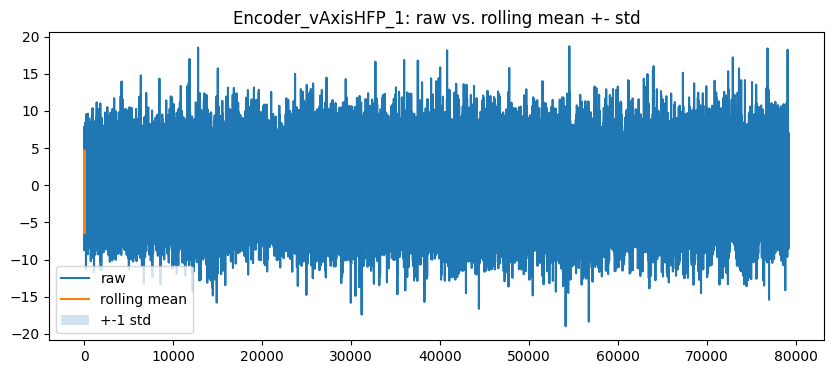

In [50]:
window = 10

# Compute rolling mean and std for all sensors:
rolling_mean = df9.rolling(window=window, min_periods=1, center=False, on='Time').mean()
rolling_std = df9.rolling(window=window, min_periods=1, center=False, on='Time').std()

#  Other aggregations:
rolling_median = df9.rolling(window, min_periods=1, on='Time').median()
rolling_quantile = df9.rolling(window, min_periods=1, on='Time').quantile(0.95)
rolling_var = df9.rolling(window, min_periods=1, on='Time').var()

# 5. Visualize one sensor’s raw vs. rolling-mean/±std
sensor = 'Encoder_vAxisHFP_1'
plt.figure(figsize=(10,4))
plt.plot(df9.index, df9[sensor], label='raw')
plt.plot(rolling_mean['Time'], rolling_mean[sensor], label='rolling mean')
plt.fill_between(rolling_mean.index,
                 rolling_mean[sensor] - rolling_std[sensor],
                 rolling_mean[sensor] + rolling_std[sensor],
                 alpha=0.2, label='+-1 std')
plt.legend()
plt.title(f"{sensor}: raw vs. rolling mean +- std")
plt.show()

<Figure size 1200x1200 with 0 Axes>

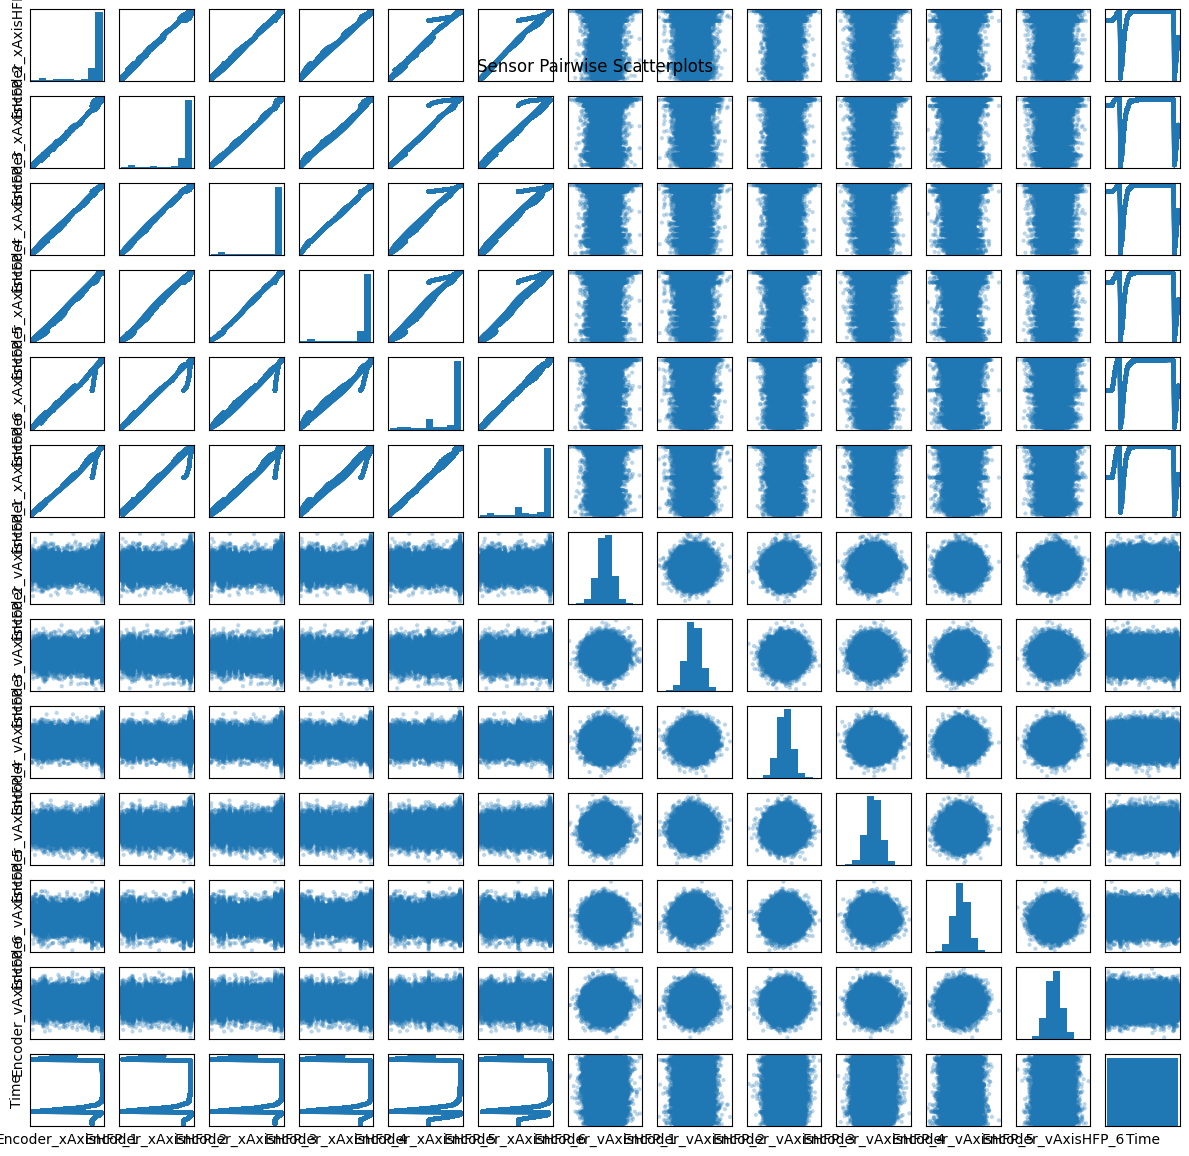

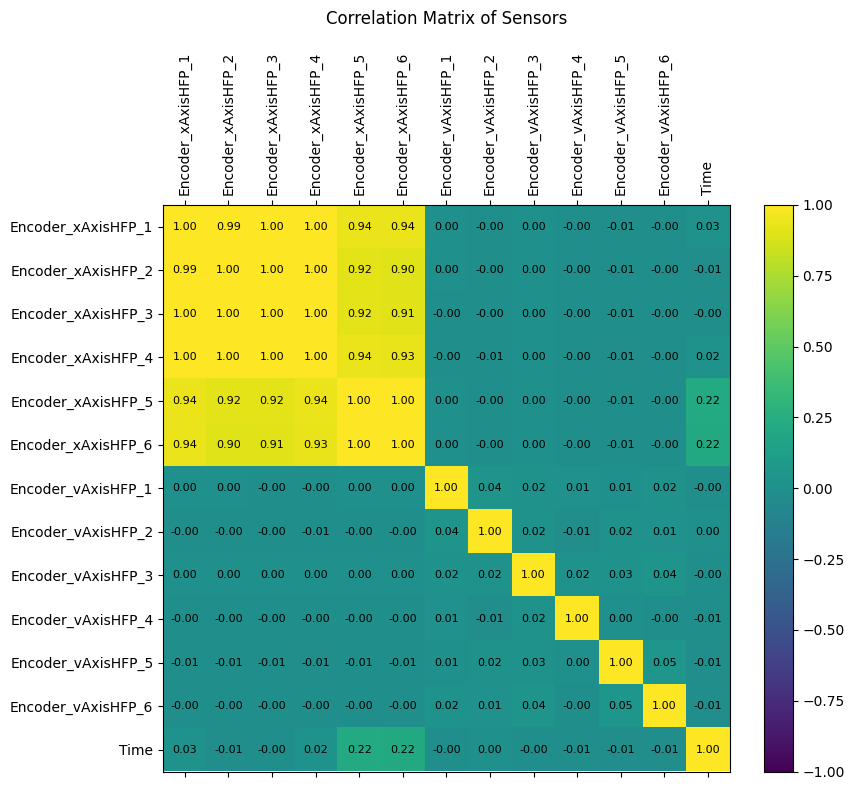

In [51]:
fig = plt.figure(figsize=(12, 12))
axes = scatter_matrix(df9, alpha=0.3, diagonal='hist', figsize=(12, 12))

for ax in axes.flatten():
    ax.set_xticks([])
    ax.set_yticks([])

plt.suptitle("Sensor Pairwise Scatterplots", y=0.92)
plt.tight_layout()
plt.show()


# Correlation Matrix Heatmap
corr = df9.corr() 

fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.matshow(corr, vmin=-1, vmax=1)
fig.colorbar(cax, fraction=0.046, pad=0.04)

# set up ticks and labels
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns, rotation=90)
ax.set_yticklabels(corr.columns)

# annotate each cell with the correlation value
for (i, j), val in np.ndenumerate(corr.values):
    ax.text(j, i, f"{val:.2f}", ha='center', va='center', fontsize=8)

plt.title("Correlation Matrix of Sensors", pad=20)
plt.tight_layout()
plt.show()

#### Isolation Forest

In [52]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_df = df9.drop(columns=['Time'])
test_df = df2.drop(columns=['Time'])
X_train = scaler.fit_transform(train_df.values)
X_test  = scaler.transform(test_df.values)


In [ ]:
from sklearn.ensemble import IsolationForest

# Initialize the Isolation Forest model
model = IsolationForest(contamination=0.01, random_state=1) # we have no outliers here
# Fit the model to the data
model.fit(train_df)

# # Predict anomalies
# df9['anomaly'] = model.predict(df9.drop(columns=['Time']))
# # Visualize anomalies
# plt.figure(figsize=(10, 6))
# plt.plot(df9['Time'], df9['Encoder_vAxisHFP_1'], label='Encoder_vAxisHFP_1')
# plt.scatter(df9['Time'][df9['anomaly'] == -1], df9
# ['Encoder_vAxisHFP_1'][df9['anomaly'] == -1], color='red', label='Anomalies')
# plt.title('Anomaly Detection using Isolation Forest')
# plt.xlabel('Time')
# plt.ylabel('Encoder_vAxisHFP_1')
# plt.legend()
# plt.show()


,n_estimators,100
,max_samples,'auto'
,contamination,0.01
,max_features,1.0
,bootstrap,False
,n_jobs,None
,random_state,1
,verbose,0
,warm_start,False


In [54]:
# anomaly score: higher = more “normal”
scores = model.score_samples(X_test)  

# binary labels: +1 normal, –1 anomaly
labels = model.predict(X_test)  

test_df = test_df.assign(
    iso_score = scores,
    iso_label = labels
)


c:\Users\ashut\.pyenv\pyenv-win\versions\3.11.8\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
c:\Users\ashut\.pyenv\pyenv-win\versions\3.11.8\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


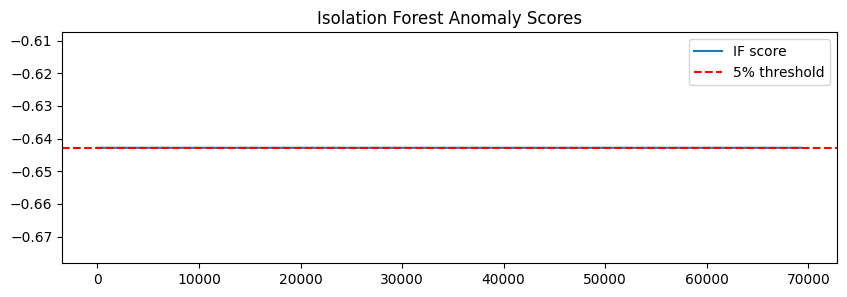

In [55]:
# pick a threshold on the raw score if you want more control:
thresh = np.percentile(scores, 5)  # lowest 5% of scores are anomalies
anoms = test_df[scores < thresh]

# plot one sensor’s score over time
plt.figure(figsize=(10,3))
plt.plot(test_df.index, test_df['iso_score'], label='IF score')
plt.axhline(thresh, color='red', linestyle='--', label='5% threshold')
plt.legend()
plt.title("Isolation Forest Anomaly Scores")
plt.show()
